In [5]:
#para manipulação de dados
import pandas as pd
import numpy as np

#para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

#para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

### Settings ###########
pd.set_option("max_colwidth", 1000)
pd.set_option("max_rows", 20)
pd.set_option("max_columns", 1000)
pd.set_option("precision", 2)
pd.options.display.float_format = "{:,.2f}".format
plt.style.use("classic")
%load_ext nb_black


OptionError: 'Pattern matched multiple keys'

In [6]:
#importando dataset
df = pd.read_csv('C:/Users/toazz/OneDrive/Documentos/brutos/wage_train.csv', index_col=0)

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education_num: continuous.
marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital_gain: continuous.
capital_loss: continuous.
hours_per_week: continuous.
native_country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
yearly_wage: >50K, <=50K.


In [7]:
#visualizando alguns dados
df.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  yearly_wage     32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [9]:
#analisando colunas
df.sex.value_counts(normalize = True)

 Male      0.669195
 Female    0.330805
Name: sex, dtype: float64

# ANÁLISE DESCRITIVA


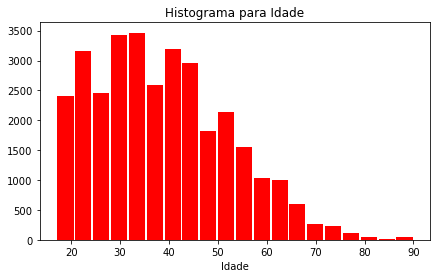

In [10]:
#Histograma para idade:
_ = plt.figure(figsize=(7, 4))
_ = plt.hist(data=df, x="age", bins=20, rwidth=0.9, color="red")
_ = plt.xlabel("Idade")
_ = plt.title("Histograma para Idade")

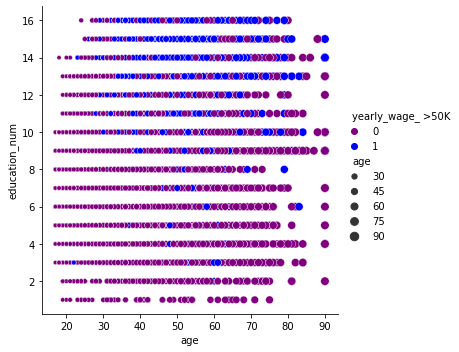

In [206]:

_ = sns.relplot(
    x="age",
    y="education_num",
    hue="yearly_wage_ >50K",
    palette=["purple", "blue"],
    size="age",
    data=df,
)

In [11]:
#Convertendo "yearly_wage" a dummy variável:
df = pd.get_dummies(df, columns=['yearly_wage'], drop_first=True)




In [161]:
df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage_ >50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [101]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'yearly_wage_ >50K'],
      dtype='object')

In [16]:
import statsmodels.api as sm
y = df['yearly_wage_ >50K']


In [23]:
x = df[["age", "capital_gain", "capital_loss", "hours_per_week", "education_num"]]

In [24]:
x = sm.add_constant(x)

In [25]:
#fit model
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      yearly_wage_ >50K   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     1921.
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:05:16   Log-Likelihood:                -14328.
No. Observations:               32560   AIC:                         2.867e+04
Df Residuals:                   32554   BIC:                         2.872e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6949      0.012    -60.

In [162]:
features = ['age', 'education_num','relationship', 'marital_status','hours_per_week', 'capital_gain', 'capital_loss', 'education']
target = 'yearly_wage_ >50K'




In [163]:
# Agora, dividimos antes de qualquer pré-processamento
X = df[features]  # Features
y = df[target]  # Labels

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.99, random_state=999
)

In [164]:
# Tratando as variáveis categóricas
cat_features = ['education','relationship', 'marital_status']
num_features = ['education_num', 'hours_per_week', 'age', 'capital_gain', 'capital_loss']

In [165]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=cat_features)

X_train = encoder.fit_transform(X_train)

X_train.head()

,age,education_num,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,marital_status_1,marital_status_2,...,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15
7958,49,9,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4965,23,9,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18531,59,7,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3769,40,13,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3092,48,13,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
X_test = encoder.transform(X_test)

X_test.head()



,age,education_num,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,marital_status_1,marital_status_2,...,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15
26154,64,16,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2043,53,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2528,49,14,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
574,29,13,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13929,34,9,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
clf_RF = RandomForestClassifier()  # instanciar (= inicializar, criar o objeto)
clf_RF.fit(X_train, y_train)  # treina o modelo

RandomForestClassifier()

In [168]:
# aplica no teste
y_pred = clf_RF.predict(X_test)

y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [169]:
# metricas de avaliacao
from sklearn.metrics import accuracy_score

print("Acurácia: " + str(accuracy_score(y_test, y_pred)))  # acertos ao todo

from sklearn.metrics import f1_score

print(
    "F1 Score: {}".format(f1_score(y_test, y_pred))
)  # indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1, melhor

Acurácia: 0.8221498371335505
F1 Score: 0.6168549087749783


In [170]:
y_pred


array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [171]:
# FEATURE IMPORTANCE
feature_imp = pd.Series(clf_RF.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
feature_imp


age                 0.264421
hours_per_week      0.193781
education_num       0.106928
marital_status_1    0.069659
capital_gain        0.057904
marital_status_2    0.037987
relationship_1      0.037029
capital_loss        0.028527
education_3         0.023962
education_7         0.022029
relationship_5      0.016604
education_1         0.015723
education_6         0.015294
education_4         0.014022
relationship_4      0.012548
relationship_2      0.011779
marital_status_3    0.011646
relationship_3      0.011622
marital_status_5    0.006636
education_11        0.006526
education_2         0.006217
education_5         0.005847
education_12        0.004713
marital_status_6    0.004366
education_10        0.004180
marital_status_4    0.003346
relationship_6      0.002389
education_15        0.001825
education_9         0.001645
education_13        0.000778
education_14        0.000062
education_8         0.000006
dtype: float64

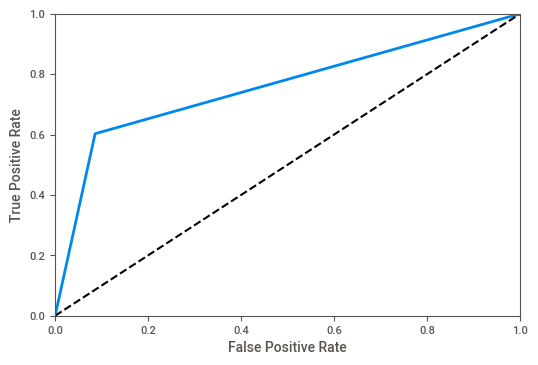

In [172]:
# CURVA ROC: calcula fpr e tpr para vários limiares
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(clf_RF, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)


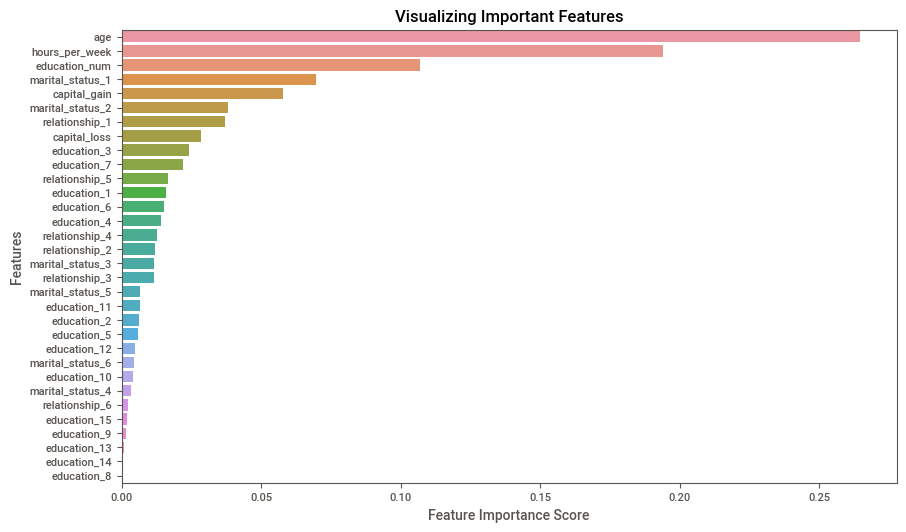

In [174]:
# Criando bar plot
_ = plt.figure(figsize=(10, 6))
_ = sns.barplot(x=feature_imp, y=feature_imp.index)


_ = plt.xlabel("Feature Importance Score")
_ = plt.ylabel("Features")
_ = plt.title("Visualizing Important Features")
_ = plt.savefig("rf_features.png")